# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [162]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

but Gdown can't. Please check connections and permissions.


## Importing Libraries

In [163]:
import numpy as np
import sklearn
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import keras
from keras import layers
from tensorflow import data as tf_data
from sklearn.preprocessing import MinMaxScaler

In [164]:
df = pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')

In [165]:
df

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147967,2016-2017,1338452,Pre-K/EI,9345,2,Heavy Traffic,C530,04/05/2017 08:00:00 AM,04/05/2017 08:10:00 AM,Bronx,...,15-20,7,Yes,Yes,No,04/05/2017 08:10:00 AM,NaN,04/05/2017 08:10:15 AM,Running Late,Pre-K
147968,2016-2017,1341521,Pre-K/EI,0001,5,Heavy Traffic,C579,04/24/2017 07:42:00 AM,04/24/2017 07:44:00 AM,Bronx,...,20 MINS,0,Yes,Yes,No,04/24/2017 07:44:00 AM,NaN,04/24/2017 07:44:15 AM,Running Late,Pre-K
147969,2016-2017,1353044,Special Ed PM Run,GC0112,X928,Heavy Traffic,09003,05/25/2017 04:22:00 PM,05/25/2017 04:28:00 PM,Bronx,...,20-25MINS,0,Yes,Yes,Yes,05/25/2017 04:28:00 PM,90323827,05/25/2017 04:34:36 PM,Running Late,School-Age
147970,2016-2017,1353045,Special Ed PM Run,5525D,Q920,Won`t Start,24457,05/25/2017 04:27:00 PM,05/25/2017 04:30:00 PM,Queens,...,NaN,0,Yes,Yes,No,05/25/2017 04:30:00 PM,NaN,05/25/2017 04:30:07 PM,Breakdown,School-Age


## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [166]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [167]:
df.sample()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
129183,2016-2017,1350746,Special Ed PM Run,2366,K269,Late return from Field Trip,21097,05/19/2017 01:45:00 PM,05/19/2017 01:43:00 PM,Brooklyn,...,30 mins,0,Yes,No,No,05/19/2017 01:43:00 PM,NaN,05/19/2017 01:43:48 PM,Running Late,School-Age


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [169]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [170]:
df.isna().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


<ipython-input-171-352a23c8fc19>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Reason',data=df,palette='viridis')


Text(0.5, 1.0, 'num Reason')

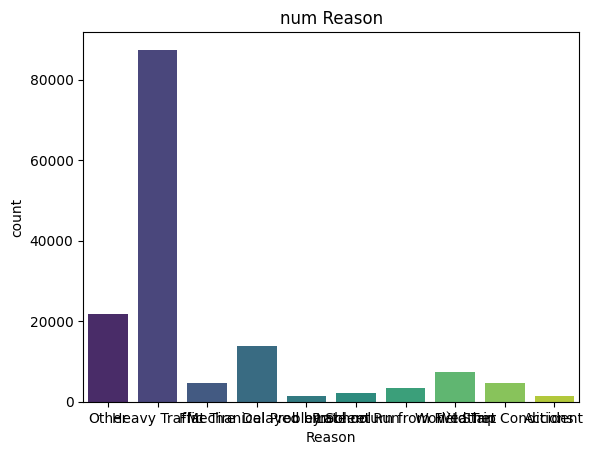

In [171]:
sns.countplot(x='Reason',data=df,palette='viridis')
plt.title('num Reason')

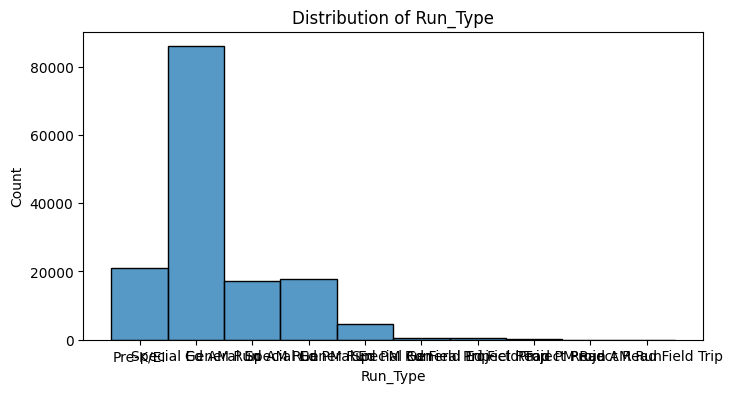

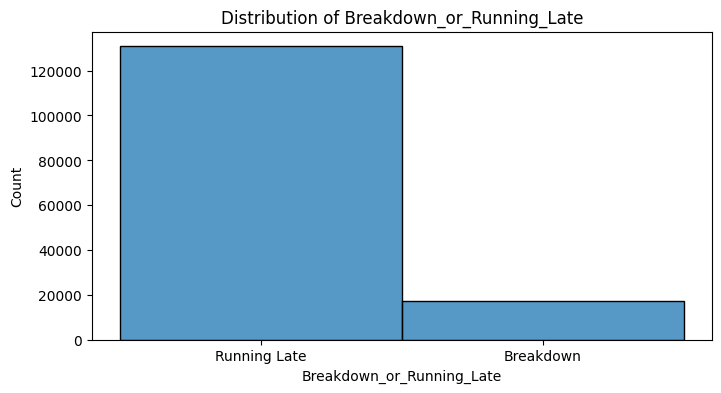

In [172]:
n_features = ['Run_Type', 'Breakdown_or_Running_Late']

for feature in n_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature])
    plt.title(f'Distribution of {feature}')
    plt.show()

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [173]:
df.isna().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [174]:
df['Run_Type'] = df['Run_Type'].fillna(df['Run_Type'].mode()[0])
df['Route_Number'] = df['Route_Number'].fillna(df['Route_Number'].mode()[0])
df['Reason'] = df['Reason'].fillna(df['Reason'].mode()[0])
df['Boro'] = df['Boro'].fillna(df['Boro'].mode()[0])

In [175]:
df['How_Long_Delayed'] = pd.to_numeric(df['How_Long_Delayed'], errors='coerce')
df['How_Long_Delayed'] = df['How_Long_Delayed'].fillna(df['How_Long_Delayed'].mean())

In [176]:
df['Incident_Number'] = pd.to_numeric(df['Incident_Number'], errors='coerce')
df['Incident_Number'] = df['Incident_Number'].fillna(df['Incident_Number'].mean())

In [177]:
df.isna().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,0
Bus_No,0
Route_Number,0
Reason,0
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,0


In [178]:
for col in df.columns:
  print(df[col].value_counts(), '\n')

School_Year
2016-2017    83141
2015-2016    63184
2017-2018     1646
2019-2020        1
Name: count, dtype: int64 

Busbreakdown_ID
1224901    1
1319719    1
1319664    1
1319665    1
1319666    1
          ..
1269646    1
1269647    1
1269648    1
1269649    1
1353046    1
Name: count, Length: 147972, dtype: int64 

Run_Type
Special Ed AM Run          86079
Pre-K/EI                   20951
Special Ed PM Run          17672
General Ed AM Run          17182
General Ed PM Run           4541
Special Ed Field Trip        628
General Ed Field Trip        570
Project Read PM Run          300
Project Read AM Run           47
Project Read Field Trip        2
Name: count, dtype: int64 

Bus_No
9354     468
357      465
9302     434
118      357
9320     349
        ... 
20133      1
1140D      1
553D       1
160D       1
K9345      1
Name: count, Length: 10765, dtype: int64 

Route_Number
1         2657
2         2217
3         1904
5         1740
4         1093
          ... 
26Q7MD       1
M68

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   School_Year                      147972 non-null  object 
 1   Busbreakdown_ID                  147972 non-null  int64  
 2   Run_Type                         147972 non-null  object 
 3   Bus_No                           147972 non-null  object 
 4   Route_Number                     147972 non-null  object 
 5   Reason                           147972 non-null  object 
 6   Schools_Serviced                 147972 non-null  object 
 7   Occurred_On                      147972 non-null  object 
 8   Created_On                       147972 non-null  object 
 9   Boro                             147972 non-null  object 
 10  Bus_Company_Name                 147972 non-null  object 
 11  How_Long_Delayed                 147972 non-null  float64
 12  Nu

In [180]:
scaler = MinMaxScaler()
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [181]:
label_encoder = LabelEncoder()
columns = ['Breakdown_or_Running_Late', 'School_Age_or_PreK', 'Have_You_Alerted_OPT','Has_Contractor_Notified_Parents',
           'Has_Contractor_Notified_Schools','Occurred_On','Route_Number','School_Year','Informed_On','Reason','Run_Type','Route_Number','Bus_Company_Name','Boro','Bus_No'
           ]
for col in columns:
    df[col] = label_encoder.fit_transform(df[col])

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   School_Year                      147972 non-null  int64  
 1   Busbreakdown_ID                  147972 non-null  float64
 2   Run_Type                         147972 non-null  int64  
 3   Bus_No                           147972 non-null  int64  
 4   Route_Number                     147972 non-null  int64  
 5   Reason                           147972 non-null  int64  
 6   Schools_Serviced                 147972 non-null  object 
 7   Occurred_On                      147972 non-null  int64  
 8   Created_On                       147972 non-null  object 
 9   Boro                             147972 non-null  int64  
 10  Bus_Company_Name                 147972 non-null  int64  
 11  How_Long_Delayed                 147972 non-null  float64
 12  Nu

In [183]:
df = df.drop(columns=['Schools_Serviced','Created_On','Last_Updated_On'])

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   School_Year                      147972 non-null  int64  
 1   Busbreakdown_ID                  147972 non-null  float64
 2   Run_Type                         147972 non-null  int64  
 3   Bus_No                           147972 non-null  int64  
 4   Route_Number                     147972 non-null  int64  
 5   Reason                           147972 non-null  int64  
 6   Occurred_On                      147972 non-null  int64  
 7   Boro                             147972 non-null  int64  
 8   Bus_Company_Name                 147972 non-null  int64  
 9   How_Long_Delayed                 147972 non-null  float64
 10  Number_Of_Students_On_The_Bus    147972 non-null  float64
 11  Has_Contractor_Notified_Schools  147972 non-null  int64  
 12  Ha

In [185]:
df

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Occurred_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Breakdown_or_Running_Late,School_Age_or_PreK
0,0,0.081508,3,7481,77,6,56392,1,27,0.000721,0.000555,1,1,0,61017,0.008382,1,0
1,0,0.082822,3,8114,77,3,56698,1,27,0.000721,0.000333,1,1,0,61329,0.008382,1,0
2,0,0.020804,3,4662,209,3,48207,1,27,0.000721,0.001332,1,1,1,51829,0.008382,1,0
3,0,0.018876,3,4547,209,6,48064,1,27,0.000721,0.001221,1,1,1,51656,0.008382,1,0
4,0,0.020991,3,4554,209,6,48210,1,27,0.000721,0.001332,1,1,0,51836,0.008382,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147967,1,0.838898,3,8138,209,3,21443,1,27,0.000721,0.000777,1,1,0,23188,0.008382,1,0
147968,1,0.859369,3,15,479,3,25138,1,27,0.000721,0.000000,1,1,0,27087,0.008382,1,0
147969,1,0.936228,9,8642,10880,3,33560,1,26,0.000721,0.000000,1,1,1,36071,0.010009,1,1
147970,1,0.936234,9,6145,7663,9,33561,7,43,0.000721,0.000000,1,1,0,36072,0.008382,0,1


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   School_Year                      147972 non-null  int64  
 1   Busbreakdown_ID                  147972 non-null  float64
 2   Run_Type                         147972 non-null  int64  
 3   Bus_No                           147972 non-null  int64  
 4   Route_Number                     147972 non-null  int64  
 5   Reason                           147972 non-null  int64  
 6   Occurred_On                      147972 non-null  int64  
 7   Boro                             147972 non-null  int64  
 8   Bus_Company_Name                 147972 non-null  int64  
 9   How_Long_Delayed                 147972 non-null  float64
 10  Number_Of_Students_On_The_Bus    147972 non-null  float64
 11  Has_Contractor_Notified_Schools  147972 non-null  int64  
 12  Ha

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [187]:
from sklearn.model_selection import train_test_split

X = df.drop(['Breakdown_or_Running_Late'], axis=1)
y = df['Breakdown_or_Running_Late']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [201]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [188]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [189]:
model_ann = Sequential()
model_ann.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model_ann.add(Dense(32, activation='relu'))
model_ann.add(Dense(16, activation='relu'))
model_ann.add(Dense(1, activation='sigmoid'))

model_ann.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,777 (14.75 KB)

 Trainable params: 3,777 (14.75 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [190]:
model_ann.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [203]:
history = model_ann.fit(
    X_train_scaled, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/10
2960/2960 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9475 - loss: 0.1297 - val_accuracy: 0.9476 - val_loss: 0.1315
Epoch 2/10
2960/2960 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9488 - loss: 0.1262 - val_accuracy: 0.9450 - val_loss: 0.1325
Epoch 3/10
2960/2960 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9488 - loss: 0.1245 - val_accuracy: 0.9476 - val_loss: 0.1281
Epoch 4/10
2960/2960 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9511 - loss: 0.1219 - val_accuracy: 0.9461 - val_loss: 0.1305
Epoch 5/10
2960/2960 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9504 - loss: 0.1228 - val_accuracy: 0.9486 - val_loss: 0.1282
Epoch 6/10
2960/2960 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9497 - loss: 0.1226 - val_accuracy: 0.9497 - val_loss: 0.1258
Epoch 7/10
2960/2960 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9514 - loss: 0.1202 - val_accuracy: 0.9495 - val_loss: 0.1273
Epoch 8/10
2960/2960 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9519 - loss: 0.1188 -

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [204]:
loss, accuracy = model_ann.evaluate(X_test_scaled, y_test)

925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9441 - loss: 0.1390


## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [205]:
from sklearn.metrics import confusion_matrix
y_pred = (model_ann.predict(X_test_scaled) > 0.5).astype("int32")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Confusion Matrix:
[[ 2755   587]
 [ 1073 25180]]


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

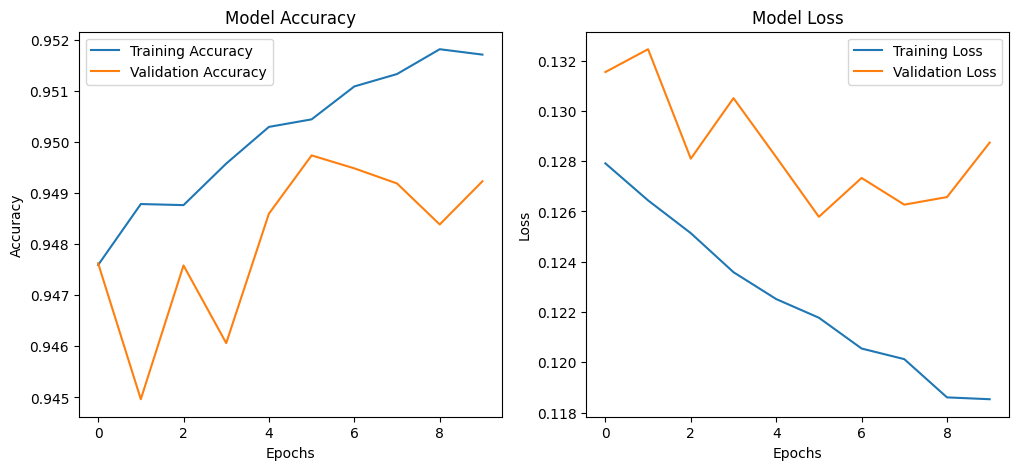

In [206]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

## Save the Model
Save the trained model for submission.

In [196]:
model_ann.save('my_model_ann.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

I used (Encoding) to convert data into numerical values

I also created an ANN model and chose the adam optimizer because it is considered one of the advanced optimizers that helps improve the update process effectively.


I chose the loss function and also calculated the accuracy to measure how well the model is at classification
But I ran into a problem with the data size

 Training the model, the Accuracy became 0.94 and the loss became 0.1